In [31]:
import pandas as pd
from pandas import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
from matplotlib.pylab import rcParams
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar
import datetime

In [2]:
aapl = pd.read_csv("C:/Users/shrini/Downloads/APPLE.csv", parse_dates=['Date'])
reliance = pd.read_csv("C:/Users/shrini/Downloads/RELIANCE.NS.csv",parse_dates=['Date'])
stocks = [aapl,reliance]

In [3]:
aapl.name='aapl'
reliance.name='reliance'

In [4]:
aapl["Date"] = pd.to_datetime(aapl["Date"])
reliance["Date"] = pd.to_datetime(reliance["Date"])


In [5]:
reliance.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,922.700012,922.700012,907.500000,909.750000,904.174133,4321686
1,2018-01-02,913.000000,919.549988,906.400024,911.150024,905.565552,4342815
2,2018-01-03,925.000000,926.000000,913.049988,914.799988,909.193176,6175312
3,2018-01-04,918.150024,921.799988,915.700012,920.299988,914.659424,4118581
4,2018-01-05,921.799988,926.900024,920.250000,923.250000,917.591370,3401905
5,2018-01-08,926.099976,931.000000,923.500000,928.549988,922.858887,4035417
6,2018-01-09,928.150024,943.900024,924.000000,940.950012,935.182922,6534997
7,2018-01-10,943.000000,947.400024,935.500000,942.349976,936.574280,5361502
8,2018-01-11,941.799988,942.650024,935.000000,937.750000,932.002502,3588377
9,2018-01-12,943.000000,952.799988,938.250000,949.000000,943.183533,6890028


In [6]:
def features_build(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.weekofyear
    

In [7]:
for i in range(len(stocks)):
    print(stocks[i])
    features_build(stocks[i])

          Date        Open        High         Low       Close   Adj Close  \
0   2018-01-02  170.160004  172.300003  169.259995  172.259995  168.987320   
1   2018-01-03  172.529999  174.550003  171.960007  172.229996  168.957886   
2   2018-01-04  172.539993  173.470001  172.080002  173.029999  169.742706   
3   2018-01-05  173.440002  175.369995  173.050003  175.000000  171.675278   
4   2018-01-08  174.350006  175.610001  173.929993  174.350006  171.037628   
5   2018-01-09  174.550003  175.059998  173.410004  174.330002  171.018005   
6   2018-01-10  173.160004  174.300003  173.000000  174.289993  170.978760   
7   2018-01-11  174.589996  175.490005  174.490005  175.279999  171.949951   
8   2018-01-12  176.179993  177.360001  175.649994  177.089996  173.725571   
9   2018-01-16  177.899994  179.389999  176.139999  176.190002  172.842682   
10  2018-01-17  176.149994  179.250000  175.070007  179.100006  175.697388   
11  2018-01-18  179.369995  180.100006  178.250000  179.259995  

In [8]:
weeks = [4, 16, 28, 40, 52]
def indexing(stock):
    stock.index = stock['Date']
    return stock

In [9]:
indexing(aapl)
indexing(reliance)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2018-01-01,2018-01-01,922.700012,922.700012,907.500000,909.750000,904.174133,4321686,2018,1,1,1
2018-01-02,2018-01-02,913.000000,919.549988,906.400024,911.150024,905.565552,4342815,2018,1,2,1
2018-01-03,2018-01-03,925.000000,926.000000,913.049988,914.799988,909.193176,6175312,2018,1,3,1
2018-01-04,2018-01-04,918.150024,921.799988,915.700012,920.299988,914.659424,4118581,2018,1,4,1
2018-01-05,2018-01-05,921.799988,926.900024,920.250000,923.250000,917.591370,3401905,2018,1,5,1
2018-01-08,2018-01-08,926.099976,931.000000,923.500000,928.549988,922.858887,4035417,2018,1,8,2
2018-01-09,2018-01-09,928.150024,943.900024,924.000000,940.950012,935.182922,6534997,2018,1,9,2
2018-01-10,2018-01-10,943.000000,947.400024,935.500000,942.349976,936.574280,5361502,2018,1,10,2
2018-01-11,2018-01-11,941.799988,942.650024,935.000000,937.750000,932.002502,3588377,2018,1,11,2


In [10]:
def plot_time_series(stock, weeks = [4, 16, 28, 40, 52]):
        dummy = pd.DataFrame()
        # First Resampling into Weeks format to calculate for weeks\n",
        dummy['Close'] = stock['Close'].resample('W').mean()
        for i in range(len(weeks)):
            m_a = dummy['Close'].rolling(weeks[i]).mean() # M.A using inbuilt function\n",
            dummy[" Mov.AVG for " + str(weeks[i])+ " Weeks"] = m_a
            print('Calculated Moving Averages: for {0} weeks:{1}'.format(weeks[i], dummy['Close']))
            dummy.plot(title="Moving Averages for {}".format(stock.name))
            

Calculated Moving Averages: for 4 weeks:Date
2018-01-07    173.129998
2018-01-14    175.067999
2018-01-21    178.252503
2018-01-28    174.175998
2018-02-04    166.128000
2018-02-11    158.123999
2018-02-18    167.967999
2018-02-25    172.730003
2018-03-04    177.338000
2018-03-11    177.088000
2018-03-18    179.360000
2018-03-25    171.120004
2018-04-01    168.842499
2018-04-08    169.572000
2018-04-15    172.922000
2018-04-22    174.084002
2018-04-29    163.674002
2018-05-06    174.330002
2018-05-13    187.439999
2018-05-20    187.213998
2018-05-27    187.976001
2018-06-03    188.127499
2018-06-10    192.856000
2018-06-17    190.769998
2018-06-24    186.262002
2018-07-01    184.273999
2018-07-08    186.117496
2018-07-15    190.234003
2018-07-22    191.216000
2018-07-29    192.924002
2018-08-05    199.416000
2018-08-12    207.968002
2018-08-19    211.952002
2018-08-26    215.440002
2018-09-02    222.656000
2018-09-09    224.907501
2018-09-16    222.700003
2018-09-23    218.436002
2018-

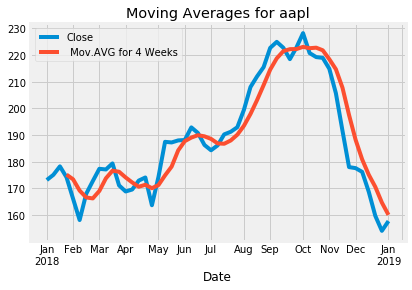

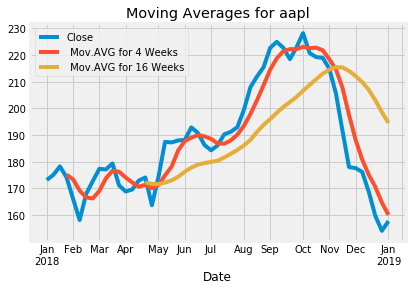

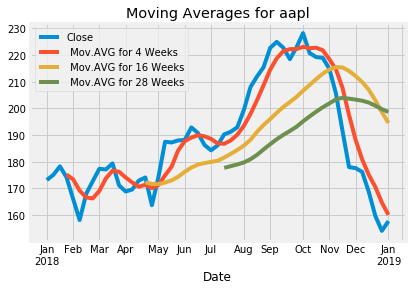

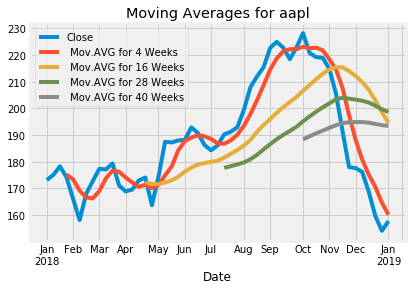

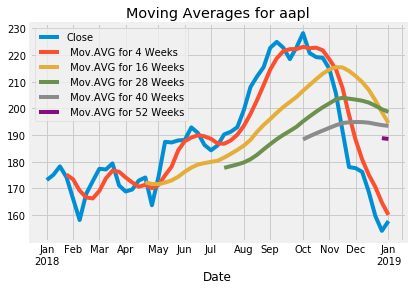

In [11]:
plot_time_series(aapl)

Calculated Moving Averages: for 4 weeks:Date
2018-01-07     915.850000
2018-01-14     939.719995
2018-01-21     929.520007
2018-01-28     971.750000
2018-02-04     944.879993
2018-02-11     898.209998
2018-02-18     926.525009
2018-02-25     927.209986
2018-03-04     948.037506
2018-03-11     909.849988
2018-03-18     920.609986
2018-03-25     896.850012
2018-04-01     894.533325
2018-04-08     901.320007
2018-04-15     926.289990
2018-04-22     937.900000
2018-04-29     969.639990
2018-05-06     962.887497
2018-05-13     977.040002
2018-05-20     960.179993
2018-05-27     921.399988
2018-06-03     921.169995
2018-06-10     959.719995
2018-06-17    1000.890014
2018-06-24    1015.059985
2018-07-01     973.330005
2018-07-08     972.809986
2018-07-15    1048.750000
2018-07-22    1098.919995
2018-07-29    1117.380005
2018-08-05    1175.009985
2018-08-12    1203.329956
2018-08-19    1200.712494
2018-08-26    1257.262481
2018-09-02    1284.159985
2018-09-09    1247.619995
2018-09-16    1249.

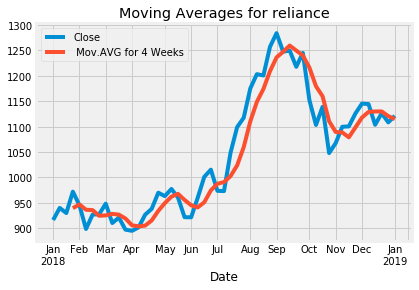

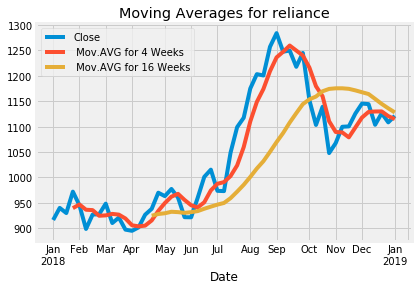

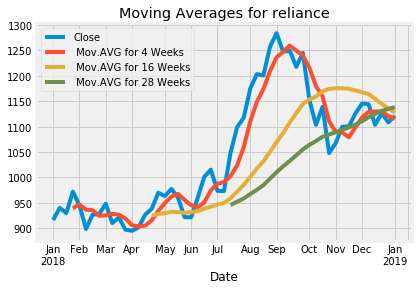

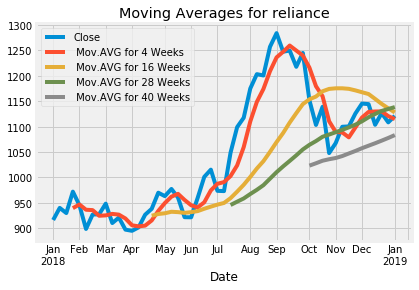

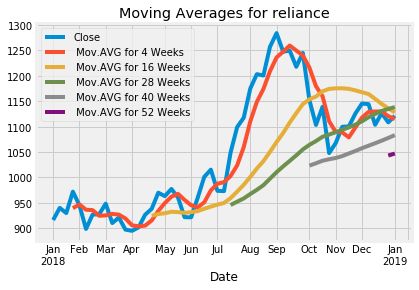

In [12]:
plot_time_series(reliance)

In [13]:
aapl = aapl.asfreq('D', method ='pad')        # pad-ffill : forward-fill\n",
reliance = reliance.asfreq('D', method ='pad')
aapl.name='aapl'
reliance.name='reliance'

In [14]:
def plot_roll_win(stock, win = [10, 75]):
    dummy = pd.DataFrame()
    dummy['Close'] = stock['Close']
    for i in range(len(win)):
        m_a = dummy['Close'].rolling(win[i]).mean() # M.A using predefined function\n",
        dummy[" Mov.AVG for" + str(win[i])+ " Roll Window"] = m_a
        print('Calculated Moving Averages: for {0} weeks:{1}' .format(win[i], dummy['Close']))
        dummy.plot(title="Moving Averages for {}".format(stock.name))

Calculated Moving Averages: for 10 weeks:Date
2018-01-02    172.259995
2018-01-03    172.229996
2018-01-04    173.029999
2018-01-05    175.000000
2018-01-06    175.000000
2018-01-07    175.000000
2018-01-08    174.350006
2018-01-09    174.330002
2018-01-10    174.289993
2018-01-11    175.279999
2018-01-12    177.089996
2018-01-13    177.089996
2018-01-14    177.089996
2018-01-15    177.089996
2018-01-16    176.190002
2018-01-17    179.100006
2018-01-18    179.259995
2018-01-19    178.460007
2018-01-20    178.460007
2018-01-21    178.460007
2018-01-22    177.000000
2018-01-23    177.039993
2018-01-24    174.220001
2018-01-25    171.110001
2018-01-26    171.509995
2018-01-27    171.509995
2018-01-28    171.509995
2018-01-29    167.960007
2018-01-30    166.970001
2018-01-31    167.429993
                 ...    
2018-12-02    178.580002
2018-12-03    184.820007
2018-12-04    176.690002
2018-12-05    176.690002
2018-12-06    174.720001
2018-12-07    168.490005
2018-12-08    168.490005
2018

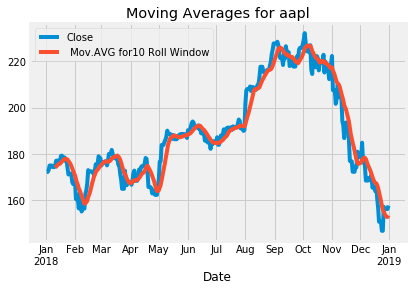

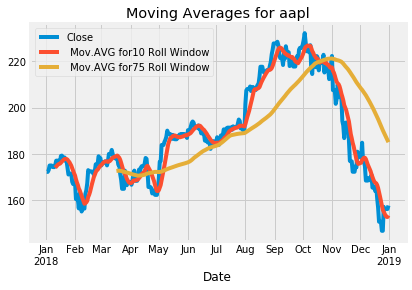

In [15]:
plot_roll_win(aapl)

Calculated Moving Averages: for 10 weeks:Date
2018-01-01     909.750000
2018-01-02     911.150024
2018-01-03     914.799988
2018-01-04     920.299988
2018-01-05     923.250000
2018-01-06     923.250000
2018-01-07     923.250000
2018-01-08     928.549988
2018-01-09     940.950012
2018-01-10     942.349976
2018-01-11     937.750000
2018-01-12     949.000000
2018-01-13     949.000000
2018-01-14     949.000000
2018-01-15     949.150024
2018-01-16     922.950012
2018-01-17     924.500000
2018-01-18     919.700012
2018-01-19     931.299988
2018-01-20     931.299988
2018-01-21     931.299988
2018-01-22     971.500000
2018-01-23     983.250000
2018-01-24     966.349976
2018-01-25     965.900024
2018-01-26     965.900024
2018-01-27     965.900024
2018-01-28     965.900024
2018-01-29     964.500000
2018-01-30     950.400024
                 ...     
2018-12-03    1156.449951
2018-12-04    1152.300049
2018-12-05    1155.150024
2018-12-06    1123.650024
2018-12-07    1133.800049
2018-12-08    1133

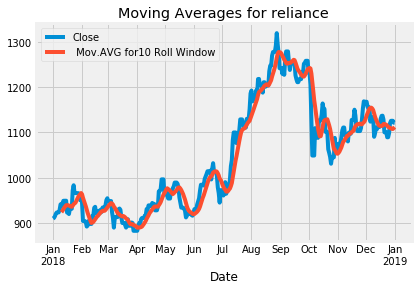

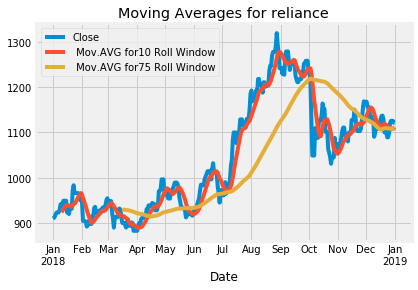

In [16]:
plot_roll_win(reliance)

"From Above graph plottings, we can visualize that, as much as the rolling window is small, the moving average is somehow significant and closer to the actual data"


In [17]:
def volume_shocks(stock):
    'Volume - Vol_t'
    'Volume next day - vol_t+1'
    stock["vol_t+1"] = stock.Volume.shift(1)  #next rows value\n",
    stock["volume_shock"] = ((abs(stock["vol_t+1"] - stock["Volume"])/stock ["Volume"]*100)  > 10).astype(int)
    return stock

In [18]:
volume_shocks(aapl)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock
Date,,,,,,,,,,,,,
2018-01-02,2018-01-02,170.160004,172.300003,169.259995,172.259995,168.987320,25555900,2018,1,2,1,NaN,0
2018-01-03,2018-01-03,172.529999,174.550003,171.960007,172.229996,168.957886,29517900,2018,1,3,1,25555900.0,1
2018-01-04,2018-01-04,172.539993,173.470001,172.080002,173.029999,169.742706,22434600,2018,1,4,1,29517900.0,1
2018-01-05,2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000,2018,1,5,1,22434600.0,0
2018-01-06,2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000,2018,1,5,1,23660000.0,0
2018-01-07,2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000,2018,1,5,1,23660000.0,0
2018-01-08,2018-01-08,174.350006,175.610001,173.929993,174.350006,171.037628,20567800,2018,1,8,2,23660000.0,1
2018-01-09,2018-01-09,174.550003,175.059998,173.410004,174.330002,171.018005,21584000,2018,1,9,2,20567800.0,0
2018-01-10,2018-01-10,173.160004,174.300003,173.000000,174.289993,170.978760,23959900,2018,1,10,2,21584000.0,0


In [19]:
def direction_fun(stock):
    # considerng only shock - 1 valued rows.\n",
    # 0 - negative and 1- positive\n",
    if stock["volume_shock"] == 0:
        pass
    else:
        if (stock["vol_t+1"] - stock["Volume"]) < 0:
            return 0
        else:
            return 1

In [20]:
def vol_shock_direction(stock):
    stock['VOL_SHOCK_DIR'] = 'Nan'
    stock['VOL_SHOCK_DIR'] = stock.apply(direction_fun, axis=1)
    return stock

In [21]:
vol_shock_direction(aapl)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR
Date,,,,,,,,,,,,,,
2018-01-02,2018-01-02,170.160004,172.300003,169.259995,172.259995,168.987320,25555900,2018,1,2,1,NaN,0,NaN
2018-01-03,2018-01-03,172.529999,174.550003,171.960007,172.229996,168.957886,29517900,2018,1,3,1,25555900.0,1,0.0
2018-01-04,2018-01-04,172.539993,173.470001,172.080002,173.029999,169.742706,22434600,2018,1,4,1,29517900.0,1,1.0
2018-01-05,2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000,2018,1,5,1,22434600.0,0,NaN
2018-01-06,2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000,2018,1,5,1,23660000.0,0,NaN
2018-01-07,2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000,2018,1,5,1,23660000.0,0,NaN
2018-01-08,2018-01-08,174.350006,175.610001,173.929993,174.350006,171.037628,20567800,2018,1,8,2,23660000.0,1,1.0
2018-01-09,2018-01-09,174.550003,175.059998,173.410004,174.330002,171.018005,21584000,2018,1,9,2,20567800.0,0,NaN
2018-01-10,2018-01-10,173.160004,174.300003,173.000000,174.289993,170.978760,23959900,2018,1,10,2,21584000.0,0,NaN


In [22]:
volume_shocks(reliance)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock
Date,,,,,,,,,,,,,
2018-01-01,2018-01-01,922.700012,922.700012,907.500000,909.750000,904.174133,4321686,2018,1,1,1,NaN,0
2018-01-02,2018-01-02,913.000000,919.549988,906.400024,911.150024,905.565552,4342815,2018,1,2,1,4321686.0,0
2018-01-03,2018-01-03,925.000000,926.000000,913.049988,914.799988,909.193176,6175312,2018,1,3,1,4342815.0,1
2018-01-04,2018-01-04,918.150024,921.799988,915.700012,920.299988,914.659424,4118581,2018,1,4,1,6175312.0,1
2018-01-05,2018-01-05,921.799988,926.900024,920.250000,923.250000,917.591370,3401905,2018,1,5,1,4118581.0,1
2018-01-06,2018-01-05,921.799988,926.900024,920.250000,923.250000,917.591370,3401905,2018,1,5,1,3401905.0,0
2018-01-07,2018-01-05,921.799988,926.900024,920.250000,923.250000,917.591370,3401905,2018,1,5,1,3401905.0,0
2018-01-08,2018-01-08,926.099976,931.000000,923.500000,928.549988,922.858887,4035417,2018,1,8,2,3401905.0,1
2018-01-09,2018-01-09,928.150024,943.900024,924.000000,940.950012,935.182922,6534997,2018,1,9,2,4035417.0,1


In [23]:
vol_shock_direction(reliance)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR
Date,,,,,,,,,,,,,,
2018-01-01,2018-01-01,922.700012,922.700012,907.500000,909.750000,904.174133,4321686,2018,1,1,1,NaN,0,NaN
2018-01-02,2018-01-02,913.000000,919.549988,906.400024,911.150024,905.565552,4342815,2018,1,2,1,4321686.0,0,NaN
2018-01-03,2018-01-03,925.000000,926.000000,913.049988,914.799988,909.193176,6175312,2018,1,3,1,4342815.0,1,0.0
2018-01-04,2018-01-04,918.150024,921.799988,915.700012,920.299988,914.659424,4118581,2018,1,4,1,6175312.0,1,1.0
2018-01-05,2018-01-05,921.799988,926.900024,920.250000,923.250000,917.591370,3401905,2018,1,5,1,4118581.0,1,1.0
2018-01-06,2018-01-05,921.799988,926.900024,920.250000,923.250000,917.591370,3401905,2018,1,5,1,3401905.0,0,NaN
2018-01-07,2018-01-05,921.799988,926.900024,920.250000,923.250000,917.591370,3401905,2018,1,5,1,3401905.0,0,NaN
2018-01-08,2018-01-08,926.099976,931.000000,923.500000,928.549988,922.858887,4035417,2018,1,8,2,3401905.0,1,0.0
2018-01-09,2018-01-09,928.150024,943.900024,924.000000,940.950012,935.182922,6534997,2018,1,9,2,4035417.0,1,0.0


In [24]:
def price_shocks(stock):
    'ClosePrice - Close_t'
    'Close Price next day - vol_t+1'
    stock["price_t+1"] = stock.Close.shift(1)  #next rows value
    stock["price_shock"] = (abs((stock["price_t+1"] - stock["Close"])/stock["Close"]*100)  > 2).astype(int)
    stock["price_black_swan"] = stock['price_shock'] # Since both had same data anad info
    return stock

In [25]:
price_shocks(aapl)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan
Date,,,,,,,,,,,,,,,,,
2018-01-02,2018-01-02,170.160004,172.300003,169.259995,172.259995,168.987320,25555900,2018,1,2,1,NaN,0,NaN,NaN,0,0
2018-01-03,2018-01-03,172.529999,174.550003,171.960007,172.229996,168.957886,29517900,2018,1,3,1,25555900.0,1,0.0,172.259995,0,0
2018-01-04,2018-01-04,172.539993,173.470001,172.080002,173.029999,169.742706,22434600,2018,1,4,1,29517900.0,1,1.0,172.229996,0,0
2018-01-05,2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000,2018,1,5,1,22434600.0,0,NaN,173.029999,0,0
2018-01-06,2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000,2018,1,5,1,23660000.0,0,NaN,175.000000,0,0
2018-01-07,2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000,2018,1,5,1,23660000.0,0,NaN,175.000000,0,0
2018-01-08,2018-01-08,174.350006,175.610001,173.929993,174.350006,171.037628,20567800,2018,1,8,2,23660000.0,1,1.0,175.000000,0,0
2018-01-09,2018-01-09,174.550003,175.059998,173.410004,174.330002,171.018005,21584000,2018,1,9,2,20567800.0,0,NaN,174.350006,0,0
2018-01-10,2018-01-10,173.160004,174.300003,173.000000,174.289993,170.978760,23959900,2018,1,10,2,21584000.0,0,NaN,174.330002,0,0


In [26]:
price_shocks(reliance)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan
Date,,,,,,,,,,,,,,,,,
2018-01-01,2018-01-01,922.700012,922.700012,907.500000,909.750000,904.174133,4321686,2018,1,1,1,NaN,0,NaN,NaN,0,0
2018-01-02,2018-01-02,913.000000,919.549988,906.400024,911.150024,905.565552,4342815,2018,1,2,1,4321686.0,0,NaN,909.750000,0,0
2018-01-03,2018-01-03,925.000000,926.000000,913.049988,914.799988,909.193176,6175312,2018,1,3,1,4342815.0,1,0.0,911.150024,0,0
2018-01-04,2018-01-04,918.150024,921.799988,915.700012,920.299988,914.659424,4118581,2018,1,4,1,6175312.0,1,1.0,914.799988,0,0
2018-01-05,2018-01-05,921.799988,926.900024,920.250000,923.250000,917.591370,3401905,2018,1,5,1,4118581.0,1,1.0,920.299988,0,0
2018-01-06,2018-01-05,921.799988,926.900024,920.250000,923.250000,917.591370,3401905,2018,1,5,1,3401905.0,0,NaN,923.250000,0,0
2018-01-07,2018-01-05,921.799988,926.900024,920.250000,923.250000,917.591370,3401905,2018,1,5,1,3401905.0,0,NaN,923.250000,0,0
2018-01-08,2018-01-08,926.099976,931.000000,923.500000,928.549988,922.858887,4035417,2018,1,8,2,3401905.0,1,0.0,923.250000,0,0
2018-01-09,2018-01-09,928.150024,943.900024,924.000000,940.950012,935.182922,6534997,2018,1,9,2,4035417.0,1,0.0,928.549988,0,0


In [27]:
def direction_fun_price(stock):
    "    # considerng only shock - 1 valued rows.\n",
    "    # 0 - negative and 1- positive\n",
    if stock["price_shock"] == 0:
        pass
    else:
        if (stock["price_t+1"] - stock["Close"]) < 0:
            return 0
        else:
            return 1

In [28]:
def price_shock_direction(stock):
    stock['PRICE_SHOCK_DIR'] = 'Nan'
    stock['PRICE_SHOCK_DIR'] = stock.apply(direction_fun_price, axis=1)
    return stock

In [29]:
def price_shock_wo_vol_shock(stock):
    stock["not_vol_shock"]  = (~(stock["volume_shock"].astype(bool))).astype(int)
    stock["price_shock_w/0_vol_shock"] = stock["not_vol_shock"] & stock["price_shock"]
    return stock

In [30]:
price_shock_wo_vol_shock(aapl)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan,not_vol_shock,price_shock_w/0_vol_shock
Date,,,,,,,,,,,,,,,,,,,
2018-01-02,2018-01-02,170.160004,172.300003,169.259995,172.259995,168.987320,25555900,2018,1,2,1,NaN,0,NaN,NaN,0,0,1,0
2018-01-03,2018-01-03,172.529999,174.550003,171.960007,172.229996,168.957886,29517900,2018,1,3,1,25555900.0,1,0.0,172.259995,0,0,0,0
2018-01-04,2018-01-04,172.539993,173.470001,172.080002,173.029999,169.742706,22434600,2018,1,4,1,29517900.0,1,1.0,172.229996,0,0,0,0
2018-01-05,2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000,2018,1,5,1,22434600.0,0,NaN,173.029999,0,0,1,0
2018-01-06,2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000,2018,1,5,1,23660000.0,0,NaN,175.000000,0,0,1,0
2018-01-07,2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000,2018,1,5,1,23660000.0,0,NaN,175.000000,0,0,1,0
2018-01-08,2018-01-08,174.350006,175.610001,173.929993,174.350006,171.037628,20567800,2018,1,8,2,23660000.0,1,1.0,175.000000,0,0,0,0
2018-01-09,2018-01-09,174.550003,175.059998,173.410004,174.330002,171.018005,21584000,2018,1,9,2,20567800.0,0,NaN,174.350006,0,0,1,0
2018-01-10,2018-01-10,173.160004,174.300003,173.000000,174.289993,170.978760,23959900,2018,1,10,2,21584000.0,0,NaN,174.330002,0,0,1,0


In [32]:
def bokeh_plot(stock):
    data = dict(stock=stock['Close'], Date=stock.index)
    p = figure(plot_width=800, plot_height=250,  title = 'time series for {}' .format(stock.Volume), x_axis_type="datetime")
    p.line(stock.index, stock['Close'], color='blue', alpha=0.5)
    #show price shock w/o vol shock\n",
    p.circle(stock.index, stock.Close*stock["price_shock_w/0_vol_shock"], size=4, legend='price shock without vol shock')
    show(p)

In [33]:
bokeh_plot(aapl)